In [1]:
import pandas as pd
import numpy as np
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler, perform_ttest

frames = []

dh = DataHandler()
dh.data.head()

,Optimal_Affected_Component,Optimal_Failure,raw,cube,sqt,log10,ln,log2
0,Query Service,CF1,49.5,5.558599,13.105330,2.234896,5.146038,7.424164
1,User Management Service,CF2,16.0,4.920383,10.914362,2.075997,4.780159,6.896312
2,Authentication Service,CF3,31.5,4.920383,10.914362,2.075997,4.780159,6.896312
3,Bid and Buy Service,CF3,25.0,4.594071,9.846831,1.986593,4.574299,6.599319
4,Item Management Service,CF3,16.0,3.559606,6.715880,1.654206,3.808950,5.495153


In [2]:
total = len(dh.data.index)
groups = dh.data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).ngroups

print('We have ' + str(groups) + ' unqiue combinations of <component, failre> and at total ' + str(total) + ' data points.')

We have 71 unqiue combinations of <component, failre> and at total 10928 data points.


# Task 1: Plot the distribution 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71]),
 <a list of 71 Text major ticklabel objects>)

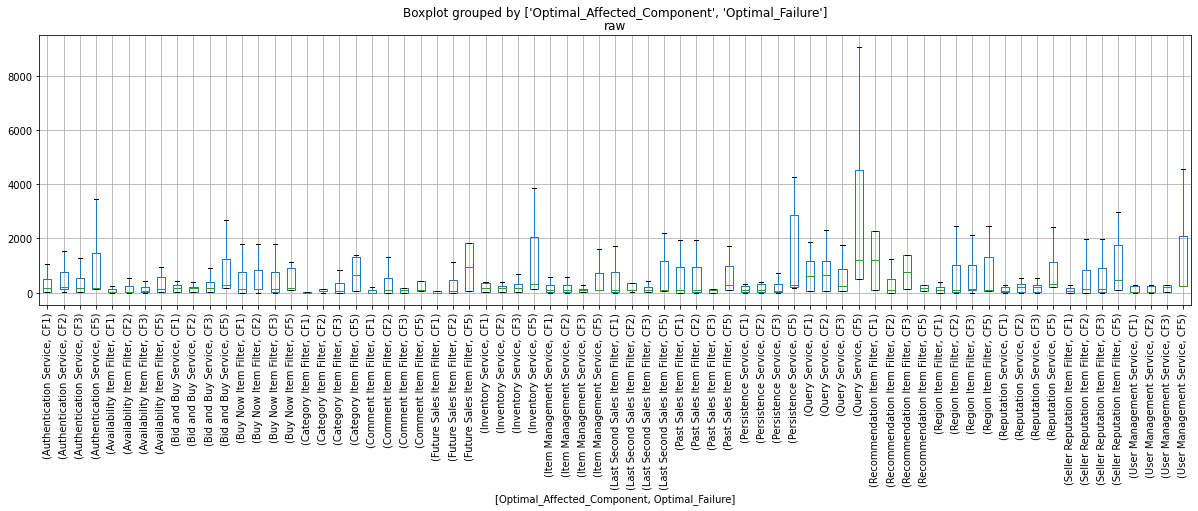

In [3]:
import matplotlib.pyplot as plt
dh.data.boxplot(by=['Optimal_Affected_Component', 'Optimal_Failure'], column="raw", figsize=(20,5), showfliers=False)
plt.xticks(rotation='vertical')

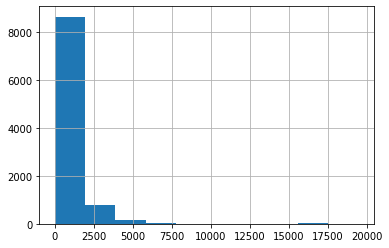

In [4]:
dh.data['raw'].hist()

# Task 2: Compute statistics

* mean = average of the numbers
* median = separating the higher half from the lower half
* mode = the value that appears most often, it can be multiple values
* std = standard deviation
* skew = skewness, measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
* kurtosis = measure of the "tailedness" of the probability distribution of a real-valued random variable

In [5]:
untransformed_data = dh.data[['Optimal_Affected_Component','Optimal_Failure','raw']]

## Mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122463370>]],
      dtype=object)

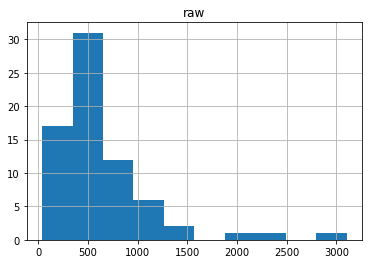

In [6]:
mean_values = untransformed_data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('mean')
mean_values.hist()

In [7]:
# get the outliers
mean_group = mean_values.apply(lambda x: x)
mean_group[mean_group.raw > 1700]

raw
Optimal_Affected_Component Optimal_Failure             
Query Service              CF1              2219.978165
                           CF2              2087.293458
                           CF5              3102.656684

## Median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12257e700>]],
      dtype=object)

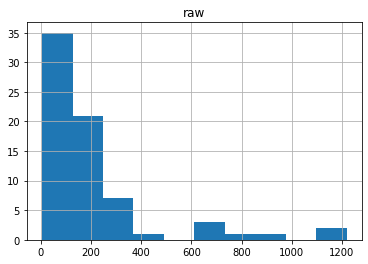

In [8]:
median = untransformed_data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('median')
median.hist()

In [9]:
# get the outliers
group = median.apply(lambda x: x)
group[group.raw > 600]

raw
Optimal_Affected_Component Optimal_Failure             
Category Item Filter       CF5               665.719122
Future Sales Item Filter   CF5               960.823229
Query Service              CF1               616.342395
                           CF2               638.460292
                           CF5              1218.511276
Recommendation Item Filter CF1              1190.805189
                           CF3               769.139019

## Mode

(array([73.,  3.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.]),
 array([   5.      ,  233.793025,  462.58605 ,  691.379075,  920.1721  ,
        1148.965125, 1377.75815 , 1606.551175, 1835.3442  , 2064.137225,
        2292.93025 ]),
 <a list of 10 Patch objects>)

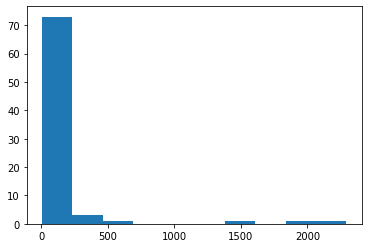

In [10]:
import operator
import functools

mode = untransformed_data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg(pd.Series.mode)
mode_values = mode['raw'].values
mode_flatten = np.hstack(mode_values).tolist()

plt.hist(mode_flatten)

In [11]:
# get the outliers
mode_group = mode.apply(lambda x: x)
high_values = []
for index, row in mode_group.iterrows():
    if isinstance(row['raw'], np.ndarray):
        for value in row['raw']:
            if value >= 400:
                high_values.append([str(index), value])
    else:
        if row['raw'] >= 400:
            high_values.append([str(index), row['raw']])

print('Outliers:')
for value in high_values:
    print(value)

Outliers:
["('Future Sales Item Filter', 'CF5')", 1850.09346]
["('Query Service', 'CF5')", 498.26343960000014]
["('Recommendation Item Filter', 'CF1')", 2292.93025]
["('Recommendation Item Filter', 'CF3')", 1405.257845]


## standard deviation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1220d1040>]],
      dtype=object)

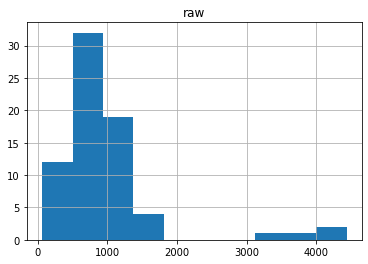

In [12]:
std = untransformed_data.groupby(['Optimal_Affected_Component', 'Optimal_Failure']).agg('std')
std.hist()

In [13]:
# get the outliers
std_group = std.apply(lambda x: x)
std_group[std_group.raw > 2000]

raw
Optimal_Affected_Component Optimal_Failure             
Query Service              CF1              4433.458518
                           CF2              4227.087309
                           CF3              3683.953364
                           CF5              3549.914299

## skewness
measure of the asymmetry of the probability distribution of a real-valued random variable about its mean

In [14]:
values = untransformed_data['raw']
values.skew()

6.032647808507236

In [15]:
# we have positive skewed data
(values.mode() < values.median()) & (values.median() < values.mean())

0    True
dtype: bool

## kurtosis
measure of the "tailedness" of the probability distribution of a real-valued random variable

In [16]:
kurtosis = untransformed_data['raw'].kurt()
kurtosis

54.48617183127999

In [17]:
# having leptokurtical data
exzess = kurtosis - 3
exzess > 0

True

# Result:

* The combination of <Query Service,CF5> shows particular high values
* We have a positive skewness, that increases the probability to get a lower value compared to the average.
* We have leptokurtical data what means that the values are distributed over a small range.